In [71]:
 !pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


In [73]:
import torch
from torchvision import models
#vgg is a model with CNN architecture.
#we wont be using the classifier part of the model as we only are concerned with Features(content and style features form convolutional layer)
vgg= models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [74]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [75]:
#freeze the parameters(weights, biases) because no gradient computation is required during the training part.
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [76]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [77]:
vgg.to(device) #model.to(device),models-torchvision

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [78]:
#preprocess image
from  PIL import Image
from torchvision import transforms as T

def preprocess(img_path, maxSize = 500):#resize image if it exceeds max size
  image = Image.open(img_path).convert('RGB')

  if max(image.size)> maxSize:
    size =maxSize
  else:
    size = max(image.size)
    
  img_transformation = T.Compose([
                    T.Resize(size),
                    T.ToTensor(),
                    T.Normalize(mean =[0.485,0.456, 0.406],
                                std= [0.229, 0.224, 0.225])

  ])
  image = img_transformation(image)
  image = image.unsqueeze(0)
  return image


In [79]:
content_p = preprocess("/content/Project-NST/ID.jpeg").to(device)
style_p = preprocess("/content/Project-NST/style11.jpg").to(device)

print("content",content_p.shape)
print("style",style_p.shape)


content torch.Size([1, 3, 521, 500])
style torch.Size([1, 3, 500, 577])


In [80]:
#/deprocess image 
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0)
  image = image.transpose(1,2,0)
  image = image * np.array([0.229, 0.224, 0.225])+ np.array([0.485,0.456, 0.406]) 
  image = image.clip(0,1)
  return image
  


In [81]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("content",content_d.shape)
print("style",style_d.shape)

content (521, 500, 3)
style (500, 577, 3)


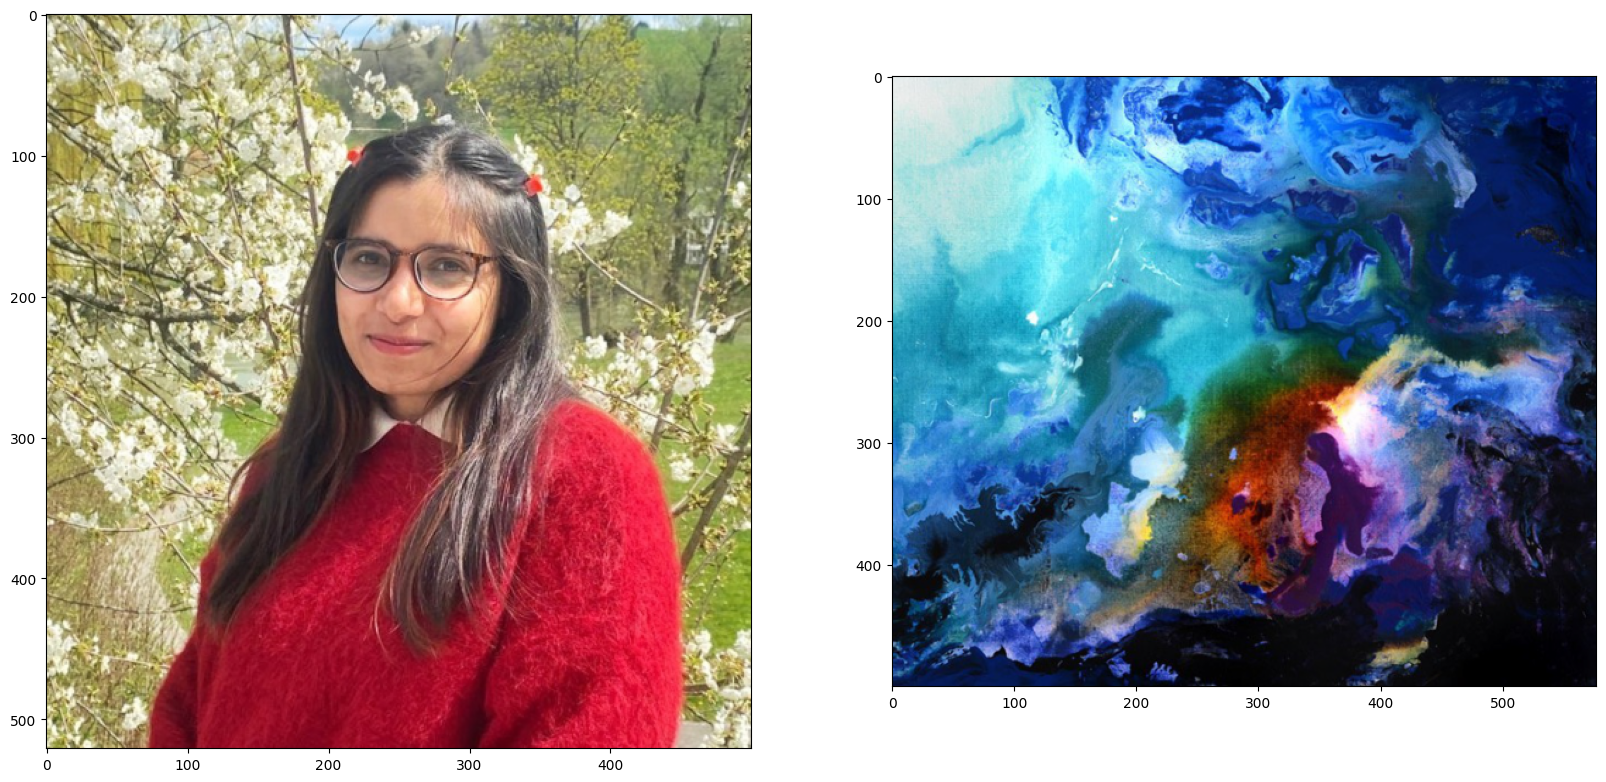

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10)) 
ax1.imshow(content_d) 
ax2.imshow(style_d)

In [83]:
def get_features(image, model):

  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2' ,#content feature
      '28': 'conv5_1'
  }
  x= image
  Features= {}
  for name,layer in model._modules.items():

    x = layer(x)
    if name in layers :
      Features[layers[name]]= x 
  return Features


In [84]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

In [85]:
def gram_matrix(tensor):
  batch,channel, height, width = tensor.size()
  tensor = tensor.view(channel, height*width)
  gram = torch.mm(tensor, tensor.t())
  return gram



In [86]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

In [87]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss


In [88]:
style_weights = {
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

In [89]:
def style_loss(style_weights,target_features,style_gram):
  loss = 0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b,c,h,w = target_f.shape
    layer_loss= style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/c*h*w
  
  return loss


In [90]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print(target_f.keys())
print(content_f.keys())
# print('content loss', content_loss(target_f['conv4_2'], content_f['conv4_2']))
# print('style_loss', style_loss(style_weights, target_f, style_gram))

dict_keys(['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv4_2', 'conv5_1'])
dict_keys(['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv4_2', 'conv5_1'])


In [92]:
print('content loss', content_loss(target_f['conv4_2'], content_f['conv4_2']))
print('style_loss', style_loss(style_weights, target_f, style_grams))

content loss tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style_loss tensor(6.1241e+13, device='cuda:0', grad_fn=<AddBackward0>)


In [93]:
from torch import optim

optimizer = optim.Adam([target], lr = 0.003)
alpha = 1
beta = 1e5
epochs = 3000
show_every= 500

In [94]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [95]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()
  if i% show_every == 0 :
    print("Total loss at Epoch {} : {}".format(i, t_loss) )
    results.append(deprocess(target.detach()))

Total loss at Epoch 0 : 6.124058215119323e+18
Total loss at Epoch 500 : 9.052890834822758e+16
Total loss at Epoch 1000 : 4.319595067971994e+16
Total loss at Epoch 1500 : 2.599691949912883e+16
Total loss at Epoch 2000 : 1.6219829102968832e+16
Total loss at Epoch 2500 : 1.0163967091539968e+16


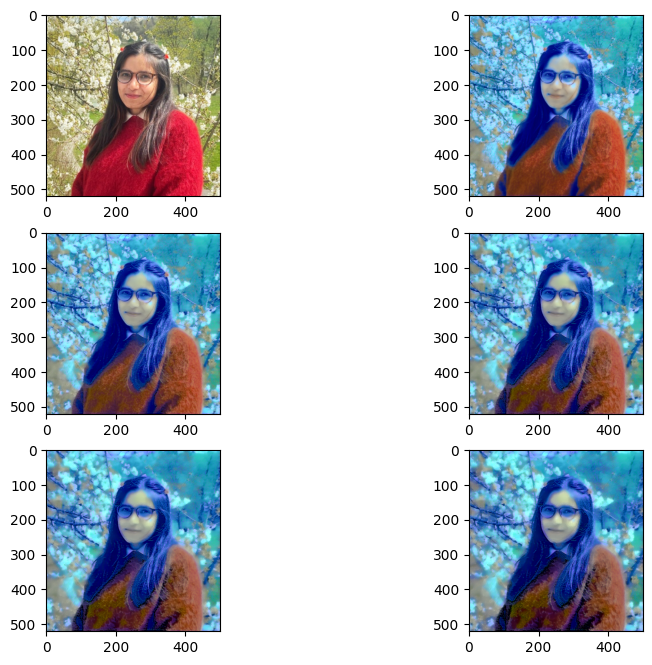

In [96]:
plt.figure(figsize= (10, 8))
for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

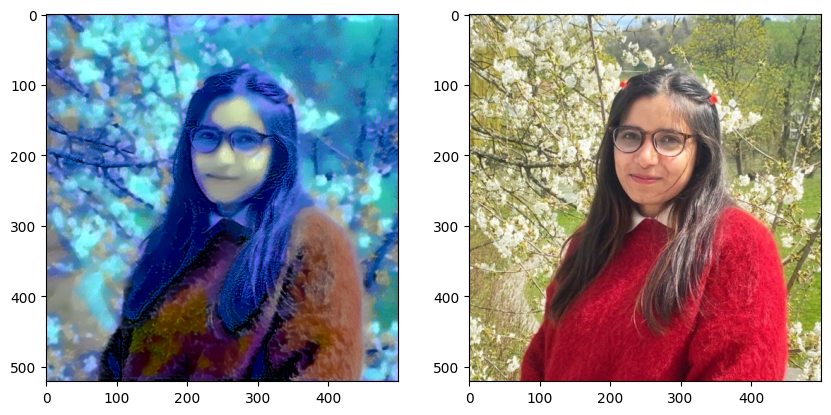

In [97]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)